In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("luvathoms/portugal-real-estate-2024")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\35192\.cache\kagglehub\datasets\luvathoms\portugal-real-estate-2024\versions\7


In [2]:
import pandas as pd

df = pd.read_csv(path+'\portugal_listinigs.csv')

C:\Users\35192\AppData\Local\Temp\ipykernel_24448\647281331.py:3: DtypeWarning: Columns (6,8,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path+'\portugal_listinigs.csv')


In [3]:
df.drop_duplicates(inplace=True, keep='first')

In [4]:
# Dataframe summary

def summary(df):
    #print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

Data Type  Missing#  Missing%  Dups  Uniques   Count  \
Price                   float64       268  0.002304     0     4493  116040   
District                 object         0  0.000000     0       25  116308   
City                     object         0  0.000000     0      272  116308   
Town                     object         2  0.000017     0     2249  116306   
Type                     object        15  0.000129     0       21  116293   
EnergyCertificate        object        13  0.000112     0       12  116295   
Floor                    object     90209  0.775604     0       19   26099   
Parking                 float64       146  0.001255     0        4  116162   
HasParking               object     52426  0.450751     0        2   63882   
ConstructionYear        float64     39858  0.342694     0      124   76450   
TotalArea               float64      6944  0.059704     0     7232  109364   
GrossArea               float64     90294  0.776335     0     2267   26014   
EnergyEfficiencyLevel    object     63912  0.549506     0       11   52396   
PublishDate              object     95938  0.824862     0    20358   20370   
Garage                   object     63912  0.549506     0        2   52396   
Elevator                 object        30  0.000258     0        2  116278   
ElectricCarsCharging     object     63912  0.549506     0        2   52396   
TotalRooms              float64     51456  0.442412     0       58   64852   
NumberOfBedrooms        float64     80826  0.694931     0       22   35482   
NumberOfWC              float64     70242  0.603931     0       26   46066   
ConservationStatus       object    101239  0.870439     0        6   15069   
LivingArea              float64     27065  0.232701     0     2924   89243   
LotSize                 float64     84614  0.727499     0     6466   31694   
BuiltArea               float64     95466  0.820803     0     6523   20842   
NumberOfBathrooms       float64      5697  0.048982     0       44  110611   

                             Min            Max        Average  \
Price                        1.0   1380000000.0  369826.910149   
District                     NaN            NaN            NaN   
City                         NaN            NaN            NaN   
Town                         NaN            NaN            NaN   
Type                         NaN            NaN            NaN   
EnergyCertificate            NaN            NaN            NaN   
Floor                        NaN            NaN            NaN   
Parking                      0.0            3.0       0.557764   
HasParking                   NaN            NaN            NaN   
ConstructionYear          1900.0         2024.0     1988.54913   
TotalArea             -7196067.0  61420071105.0  597243.366985   
GrossArea                   -7.0     12750000.0    2927.940647   
EnergyEfficiencyLevel        NaN            NaN            NaN   
PublishDate                  NaN            NaN            NaN   
Garage                       NaN            NaN            NaN   
Elevator                     NaN            NaN            NaN   
ElectricCarsCharging         NaN            NaN            NaN   
TotalRooms                   0.0         2751.0       3.184713   
NumberOfBedrooms             0.0           21.0       2.689645   
NumberOfWC                 -15.0           59.0       0.418313   
ConservationStatus           NaN            NaN            NaN   
LivingArea                   0.0      5429000.0    1520.299239   
LotSize                      0.0    992301000.0   64972.359311   
BuiltArea                   -1.0     12750000.0     3494.51889   
NumberOfBathrooms          -13.0           90.0       1.521802   

                      Standard Deviation           First Value  \
Price                     4101330.130688              250000.0   
District                             NaN                  Faro   
City                                 NaN  São Brás de Alportel   
Town        

In [5]:
selected_types = ['Apartment', 'House']
# Filter the dataset
filtered_df = df[df['Type'].isin(selected_types)]
filtered_df.reset_index(drop=True, inplace=True)

In [6]:
summary(df)

Data Type  Missing#  Missing%  Dups  Uniques   Count  \
Price                   float64       268  0.002304     0     4493  116040   
District                 object         0  0.000000     0       25  116308   
City                     object         0  0.000000     0      272  116308   
Town                     object         2  0.000017     0     2249  116306   
Type                     object        15  0.000129     0       21  116293   
EnergyCertificate        object        13  0.000112     0       12  116295   
Floor                    object     90209  0.775604     0       19   26099   
Parking                 float64       146  0.001255     0        4  116162   
HasParking               object     52426  0.450751     0        2   63882   
ConstructionYear        float64     39858  0.342694     0      124   76450   
TotalArea               float64      6944  0.059704     0     7232  109364   
GrossArea               float64     90294  0.776335     0     2267   26014   
EnergyEfficiencyLevel    object     63912  0.549506     0       11   52396   
PublishDate              object     95938  0.824862     0    20358   20370   
Garage                   object     63912  0.549506     0        2   52396   
Elevator                 object        30  0.000258     0        2  116278   
ElectricCarsCharging     object     63912  0.549506     0        2   52396   
TotalRooms              float64     51456  0.442412     0       58   64852   
NumberOfBedrooms        float64     80826  0.694931     0       22   35482   
NumberOfWC              float64     70242  0.603931     0       26   46066   
ConservationStatus       object    101239  0.870439     0        6   15069   
LivingArea              float64     27065  0.232701     0     2924   89243   
LotSize                 float64     84614  0.727499     0     6466   31694   
BuiltArea               float64     95466  0.820803     0     6523   20842   
NumberOfBathrooms       float64      5697  0.048982     0       44  110611   

                             Min            Max        Average  \
Price                        1.0   1380000000.0  369826.910149   
District                     NaN            NaN            NaN   
City                         NaN            NaN            NaN   
Town                         NaN            NaN            NaN   
Type                         NaN            NaN            NaN   
EnergyCertificate            NaN            NaN            NaN   
Floor                        NaN            NaN            NaN   
Parking                      0.0            3.0       0.557764   
HasParking                   NaN            NaN            NaN   
ConstructionYear          1900.0         2024.0     1988.54913   
TotalArea             -7196067.0  61420071105.0  597243.366985   
GrossArea                   -7.0     12750000.0    2927.940647   
EnergyEfficiencyLevel        NaN            NaN            NaN   
PublishDate                  NaN            NaN            NaN   
Garage                       NaN            NaN            NaN   
Elevator                     NaN            NaN            NaN   
ElectricCarsCharging         NaN            NaN            NaN   
TotalRooms                   0.0         2751.0       3.184713   
NumberOfBedrooms             0.0           21.0       2.689645   
NumberOfWC                 -15.0           59.0       0.418313   
ConservationStatus           NaN            NaN            NaN   
LivingArea                   0.0      5429000.0    1520.299239   
LotSize                      0.0    992301000.0   64972.359311   
BuiltArea                   -1.0     12750000.0     3494.51889   
NumberOfBathrooms          -13.0           90.0       1.521802   

                      Standard Deviation           First Value  \
Price                     4101330.130688              250000.0   
District                             NaN                  Faro   
City                                 NaN  São Brás de Alportel   
Town        

In [7]:
# drop all the rows with null number of bedrooms
filtered_df = filtered_df.dropna(subset=['NumberOfBedrooms'])

In [8]:
#reset the index
filtered_df.reset_index(drop=True, inplace=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                   float64       100  0.003225     0     2899  30910   
District                 object         0  0.000000     0       24  31010   
City                     object         0  0.000000     0      266  31010   
Town                     object         0  0.000000     0     2033  31010   
Type                     object         0  0.000000     0        2  31010   
EnergyCertificate        object         0  0.000000     0       11  31010   
Floor                    object     31010  1.000000     0        0      0   
Parking                 float64         0  0.000000     0        2  31010   
HasParking               object     31010  1.000000     0        0      0   
ConstructionYear        float64      2831  0.091293     0      118  28179   
TotalArea               float64         0  0.000000     0      899  31010   
GrossArea               float64     31010  1.000000     0        0      0   
EnergyEfficiencyLevel    object         0  0.000000     0       11  31010   
PublishDate              object     17442  0.562464     0    13562  13568   
Garage                   object         0  0.000000     0        2  31010   
Elevator                 object         0  0.000000     0        2  31010   
ElectricCarsCharging     object         0  0.000000     0        2  31010   
TotalRooms              float64     15225  0.490971     0       32  15785   
NumberOfBedrooms        float64         0  0.000000     0       22  31010   
NumberOfWC              float64      3453  0.111351     0       15  27557   
ConservationStatus       object     19081  0.615318     0        6  11929   
LivingArea              float64         2  0.000064     0      849  31008   
LotSize                 float64     16708  0.538794     0     2802  14302   
BuiltArea               float64     15862  0.511512     0     4702  15148   
NumberOfBathrooms       float64       105  0.003386     0       22  30905   

                          Min         Max        Average Standard Deviation  \
Price                     1.0  16800000.0  405356.200742      514559.759375   
District                  NaN         NaN            NaN                NaN   
City                      NaN         NaN            NaN                NaN   
Town                      NaN         NaN            NaN                NaN   
Type                      NaN         NaN            NaN                NaN   
EnergyCertificate         NaN         NaN            NaN                NaN   
Floor                     NaN         NaN            NaN                NaN   
Parking                   0.0         1.0       0.394808           0.488817   
HasParking                NaN         NaN            NaN                NaN   
ConstructionYear       1900.0      2024.0     1991.51769          27.421353   
TotalArea              -271.0    420000.0     255.110287        4433.353196   
GrossArea                 NaN         NaN            NaN                NaN   
EnergyEfficiencyLevel     NaN         NaN            NaN                NaN   
PublishDate               NaN         NaN            NaN                NaN   
Garage                    NaN         NaN            NaN                NaN   
Elevator                  NaN         NaN            NaN                NaN   
ElectricCarsCharging      NaN         NaN            NaN                NaN   
TotalRooms                0.0      2751.0       4.529807          21.997861   
NumberOfBedrooms          0.0        21.0       2.798807           1.435149   
NumberOfWC              -15.0        59.0       0.540008           1.007757   
ConservationStatus        NaN         NaN            NaN                NaN   
LivingArea                0.0    470300.0     232.793021        4340.591736   
LotSize                   0.0  48750000.0    9690.423437      421616.831935   
BuiltArea                -1.0    470300.0     326.384902        5682.976719   
NumberOfBathrooms       -13.0        62.0   

In [9]:
# to test ydata_profiling whith a smaller data set
filtered_df.drop(["GrossArea", "HasParking", "Floor", "TotalRooms","PublishDate","ConservationStatus", "LotSize","BuiltArea"], axis=1, inplace=True) #TotalRooms
filtered_df.dropna(subset=['Price'],inplace=True)



In [10]:
filtered_df = filtered_df.reset_index(drop=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                   float64         0  0.000000  1060     2899  30910   
District                 object         0  0.000000  1060       24  30910   
City                     object         0  0.000000  1060      266  30910   
Town                     object         0  0.000000  1060     2033  30910   
Type                     object         0  0.000000  1060        2  30910   
EnergyCertificate        object         0  0.000000  1060       11  30910   
Parking                 float64         0  0.000000  1060        2  30910   
ConstructionYear        float64      2791  0.090294  1060      118  28119   
TotalArea               float64         0  0.000000  1060      898  30910   
EnergyEfficiencyLevel    object         0  0.000000  1060       11  30910   
Garage                   object         0  0.000000  1060        2  30910   
Elevator                 object         0  0.000000  1060        2  30910   
ElectricCarsCharging     object         0  0.000000  1060        2  30910   
NumberOfBedrooms        float64         0  0.000000  1060       22  30910   
NumberOfWC              float64      3452  0.111679  1060       15  27458   
LivingArea              float64         2  0.000065  1060      847  30908   
NumberOfBathrooms       float64       105  0.003397  1060       22  30805   

                          Min         Max        Average Standard Deviation  \
Price                     1.0  16800000.0  405356.200742      514559.759375   
District                  NaN         NaN            NaN                NaN   
City                      NaN         NaN            NaN                NaN   
Town                      NaN         NaN            NaN                NaN   
Type                      NaN         NaN            NaN                NaN   
EnergyCertificate         NaN         NaN            NaN                NaN   
Parking                   0.0         1.0       0.394209           0.488688   
ConstructionYear       1900.0      2024.0    1991.464312          27.417703   
TotalArea              -271.0    420000.0     255.282659        4440.513321   
EnergyEfficiencyLevel     NaN         NaN            NaN                NaN   
Garage                    NaN         NaN            NaN                NaN   
Elevator                  NaN         NaN            NaN                NaN   
ElectricCarsCharging      NaN         NaN            NaN                NaN   
NumberOfBedrooms          0.0        21.0       2.798253           1.436254   
NumberOfWC              -15.0        59.0       0.540207           1.008506   
LivingArea                0.0    470300.0     232.965575        4347.603234   
NumberOfBathrooms       -13.0        62.0       2.115046           1.486142   

                      First Value                   Second Value  \
Price                     62000.0                        98000.0   
District                   Aveiro                         Aveiro   
City                         Ovar             Albergaria-a-Velha   
Town                       Válega  Albergaria-a-Velha e Valmaior   
Type                        House                      Apartment   
EnergyCertificate               F                              F   
Parking                       1.0                            0.0   
ConstructionYear           1950.0                         1992.0   
TotalArea                   336.0                           81.0   
EnergyEfficiencyLevel           F                              F   
Garage                      False                          False   
Elevator                    False                          False   
ElectricCarsCharging        False                          False   
NumberOfBedrooms              2.0                            2.0   
NumberOfWC                    NaN                            0.0   
LivingArea                  300.0                           81.0   
NumberOfBathrooms             1.0                       

In [11]:
filtered_df.dropna(subset=['ConstructionYear'],inplace=True)

In [12]:
filtered_df.dropna(subset=['NumberOfWC'],inplace=True)

In [13]:
filtered_df.reset_index(drop=True, inplace=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                   float64         0   0.00000   582     2467  25039   
District                 object         0   0.00000   582       23  25039   
City                     object         0   0.00000   582      265  25039   
Town                     object         0   0.00000   582     1991  25039   
Type                     object         0   0.00000   582        2  25039   
EnergyCertificate        object         0   0.00000   582       11  25039   
Parking                 float64         0   0.00000   582        2  25039   
ConstructionYear        float64         0   0.00000   582      117  25039   
TotalArea               float64         0   0.00000   582      867  25039   
EnergyEfficiencyLevel    object         0   0.00000   582       11  25039   
Garage                   object         0   0.00000   582        2  25039   
Elevator                 object         0   0.00000   582        2  25039   
ElectricCarsCharging     object         0   0.00000   582        2  25039   
NumberOfBedrooms        float64         0   0.00000   582       21  25039   
NumberOfWC              float64         0   0.00000   582       13  25039   
LivingArea              float64         2   0.00008   582      824  25037   
NumberOfBathrooms       float64         0   0.00000   582       20  25039   

                          Min         Max        Average Standard Deviation  \
Price                   600.0  16800000.0  398860.747893      528857.293492   
District                  NaN         NaN            NaN                NaN   
City                      NaN         NaN            NaN                NaN   
Town                      NaN         NaN            NaN                NaN   
Type                      NaN         NaN            NaN                NaN   
EnergyCertificate         NaN         NaN            NaN                NaN   
Parking                   0.0         1.0       0.364431            0.48128   
ConstructionYear       1900.0      2024.0    1991.547386          27.717466   
TotalArea              -271.0    420000.0     275.306122        4873.894286   
EnergyEfficiencyLevel     NaN         NaN            NaN                NaN   
Garage                    NaN         NaN            NaN                NaN   
Elevator                  NaN         NaN            NaN                NaN   
ElectricCarsCharging      NaN         NaN            NaN                NaN   
NumberOfBedrooms          0.0        21.0       2.857303           1.470062   
NumberOfWC                0.0        14.0       0.522625           0.939136   
LivingArea                0.0    470300.0     232.886967        4300.322916   
NumberOfBathrooms         0.0        24.0        2.10228           1.478837   

                                         First Value        Second Value  \
Price                                        98000.0            220000.0   
District                                      Aveiro              Aveiro   
City                              Albergaria-a-Velha  Oliveira do Bairro   
Town                   Albergaria-a-Velha e Valmaior             Palhaça   
Type                                       Apartment               House   
EnergyCertificate                                  F                   F   
Parking                                          0.0                 0.0   
ConstructionYear                              1992.0              1993.0   
TotalArea                                       81.0               154.0   
EnergyEfficiencyLevel                              F                   F   
Garage                                         False                True   
Elevator                                       False               False   
ElectricCarsCharging                           False               False   
NumberOfBedrooms                                 2.0                 4.0   
NumberOfWC                                       0.0                 1.0

In [14]:
filtered_df.dropna(subset=['LivingArea'],inplace=True)

In [15]:
filtered_df.reset_index(drop=True, inplace=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                   float64         0       0.0   582     2467  25037   
District                 object         0       0.0   582       23  25037   
City                     object         0       0.0   582      265  25037   
Town                     object         0       0.0   582     1990  25037   
Type                     object         0       0.0   582        2  25037   
EnergyCertificate        object         0       0.0   582       11  25037   
Parking                 float64         0       0.0   582        2  25037   
ConstructionYear        float64         0       0.0   582      117  25037   
TotalArea               float64         0       0.0   582      867  25037   
EnergyEfficiencyLevel    object         0       0.0   582       11  25037   
Garage                   object         0       0.0   582        2  25037   
Elevator                 object         0       0.0   582        2  25037   
ElectricCarsCharging     object         0       0.0   582        2  25037   
NumberOfBedrooms        float64         0       0.0   582       21  25037   
NumberOfWC              float64         0       0.0   582       13  25037   
LivingArea              float64         0       0.0   582      824  25037   
NumberOfBathrooms       float64         0       0.0   582       20  25037   

                          Min         Max        Average Standard Deviation  \
Price                   600.0  16800000.0  398880.028218      528872.883653   
District                  NaN         NaN            NaN                NaN   
City                      NaN         NaN            NaN                NaN   
Town                      NaN         NaN            NaN                NaN   
Type                      NaN         NaN            NaN                NaN   
EnergyCertificate         NaN         NaN            NaN                NaN   
Parking                   0.0         1.0       0.364421           0.481277   
ConstructionYear       1900.0      2024.0    1991.549107          27.716334   
TotalArea              -271.0    420000.0     275.316252        4874.088826   
EnergyEfficiencyLevel     NaN         NaN            NaN                NaN   
Garage                    NaN         NaN            NaN                NaN   
Elevator                  NaN         NaN            NaN                NaN   
ElectricCarsCharging      NaN         NaN            NaN                NaN   
NumberOfBedrooms          0.0        21.0       2.857331            1.47011   
NumberOfWC                0.0        14.0       0.522666           0.939162   
LivingArea                0.0    470300.0     232.886967        4300.322916   
NumberOfBathrooms         0.0        24.0       2.102408            1.47882   

                                         First Value        Second Value  \
Price                                        98000.0            220000.0   
District                                      Aveiro              Aveiro   
City                              Albergaria-a-Velha  Oliveira do Bairro   
Town                   Albergaria-a-Velha e Valmaior             Palhaça   
Type                                       Apartment               House   
EnergyCertificate                                  F                   F   
Parking                                          0.0                 0.0   
ConstructionYear                              1992.0              1993.0   
TotalArea                                       81.0               154.0   
EnergyEfficiencyLevel                              F                   F   
Garage                                         False                True   
Elevator                                       False               False   
ElectricCarsCharging                           False               False   
NumberOfBedrooms                                 2.0                 4.0   
NumberOfWC                                       0.0                 1.0

In [16]:
filtered_df= filtered_df[filtered_df["TotalArea"]>0].reset_index(drop=True)

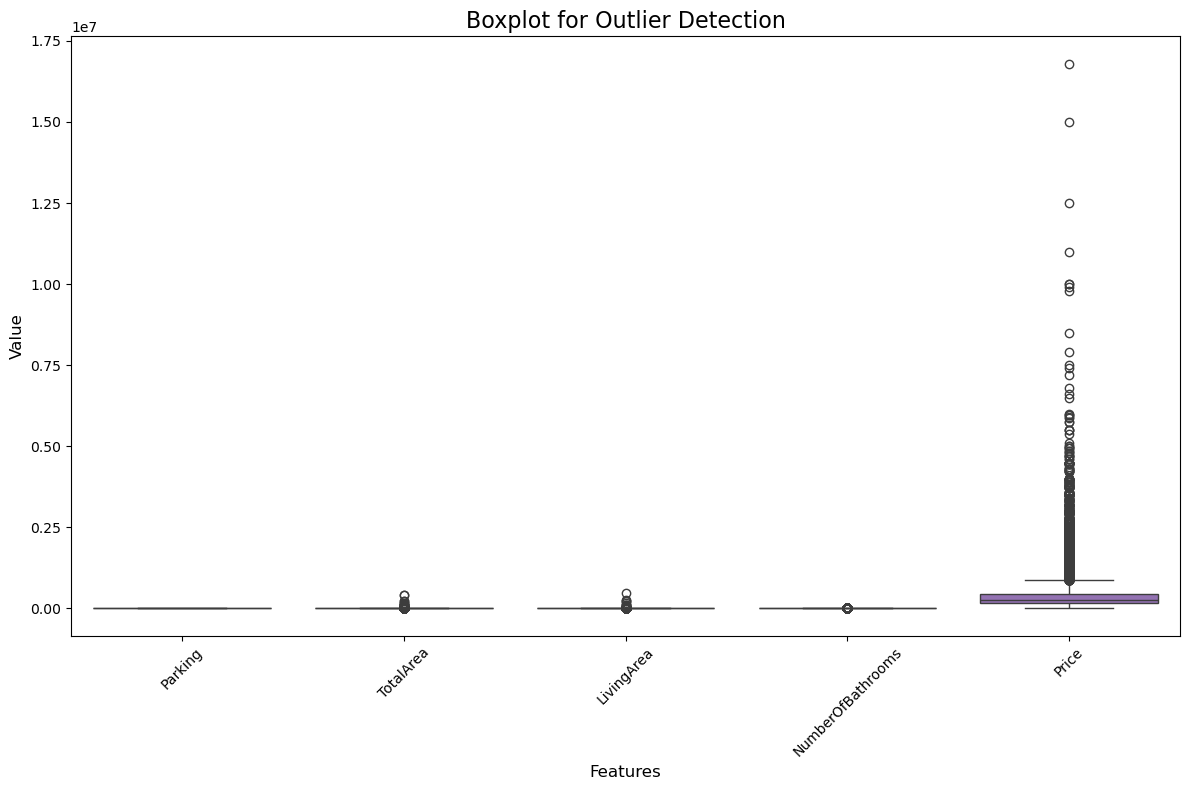

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))

numerical_columns= [ 'Parking','TotalArea', 'LivingArea', 'NumberOfBathrooms','Price']
# Create a boxplot for each numerical column
sns.boxplot(data=filtered_df[numerical_columns])

# Add title and labels
plt.title("Boxplot for Outlier Detection", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

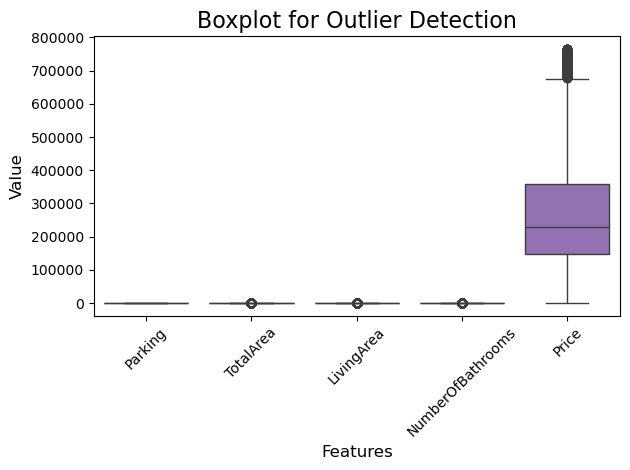

In [18]:
def remove_outliers(df, numerical_columns):
    
    data = df.copy()
    
    for feature in data[numerical_columns].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower_limit = round(Q1 - 1.5 * IQR)
        upper_limit = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper_limit,feature] = upper_limit
        data.loc[data[feature]<=lower_limit,feature] = lower_limit
        data = data[(data[feature] < upper_limit) & (data[feature] > lower_limit)]
    return data
# Remove outliers
filtered_df = remove_outliers(filtered_df, numerical_columns)
# Create a boxplot for each numerical column
sns.boxplot(data=filtered_df[numerical_columns])

# Add title and labels
plt.title("Boxplot for Outlier Detection", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Value", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [19]:
filtered_df.shape

(20523, 17)

In [20]:
from ydata_profiling import ProfileReport

In [21]:
profile = ProfileReport(filtered_df, title="Apartment/House")

In [22]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
filtered_df.drop("EnergyEfficiencyLevel", axis=1, inplace=True)

In [24]:
filtered_df.reset_index(drop=True, inplace=True)
summary(filtered_df)

Data Type  Missing#  Missing%  Dups  Uniques  Count  \
Price                  float64         0       0.0   468     1869  20523   
District                object         0       0.0   468       23  20523   
City                    object         0       0.0   468      264  20523   
Town                    object         0       0.0   468     1900  20523   
Type                    object         0       0.0   468        2  20523   
EnergyCertificate       object         0       0.0   468       11  20523   
Parking                float64         0       0.0   468        2  20523   
ConstructionYear       float64         0       0.0   468      113  20523   
TotalArea              float64         0       0.0   468      319  20523   
Garage                  object         0       0.0   468        2  20523   
Elevator                object         0       0.0   468        2  20523   
ElectricCarsCharging    object         0       0.0   468        2  20523   
NumberOfBedrooms       float64         0       0.0   468       16  20523   
NumberOfWC             float64         0       0.0   468        6  20523   
LivingArea             float64         0       0.0   468      281  20523   
NumberOfBathrooms      float64         0       0.0   468        6  20523   

                         Min       Max        Average Standard Deviation  \
Price                  600.0  765070.0  263992.942016      170088.101422   
District                 NaN       NaN            NaN                NaN   
City                     NaN       NaN            NaN                NaN   
Town                     NaN       NaN            NaN                NaN   
Type                     NaN       NaN            NaN                NaN   
EnergyCertificate        NaN       NaN            NaN                NaN   
Parking                  0.0       1.0       0.344735           0.475293   
ConstructionYear      1900.0    2024.0    1990.033036          27.617559   
TotalArea               10.0     333.0     116.611119          57.615844   
Garage                   NaN       NaN            NaN                NaN   
Elevator                 NaN       NaN            NaN                NaN   
ElectricCarsCharging     NaN       NaN            NaN                NaN   
NumberOfBedrooms         0.0      18.0       2.581202           1.194133   
NumberOfWC               0.0       5.0       0.427472           0.744233   
LivingArea               0.0     283.0      111.39619          54.916405   
NumberOfBathrooms        0.0       5.0       1.763777           1.026517   

                                        First Value  \
Price                                       98000.0   
District                                     Aveiro   
City                             Albergaria-a-Velha   
Town                  Albergaria-a-Velha e Valmaior   
Type                                      Apartment   
EnergyCertificate                                 F   
Parking                                         0.0   
ConstructionYear                             1992.0   
TotalArea                                      81.0   
Garage                                        False   
Elevator                                      False   
ElectricCarsCharging                          False   
NumberOfBedrooms                                2.0   
NumberOfWC                                      0.0   
LivingArea                                     81.0   
NumberOfBathrooms                               1.0   

                                   Second Value Third Value  
Price                                  290000.0    182000.0  
District                                 Aveiro      Aveiro  
City                       Santa Maria da Feira     Espinho  
Town                  Canedo, Vale e Vila Maior     Espinho  
Type                                      House   Apartment  
EnergyCertificate                             F           D  
Parking                                     0.0         1.0  
Con

In [26]:
filtered_df.to_csv('filtered_df.csv', index=False)

Make pre modeling XAI 